In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [290]:
df=pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
#df.Age=df['Age'].fillna(0)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [293]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


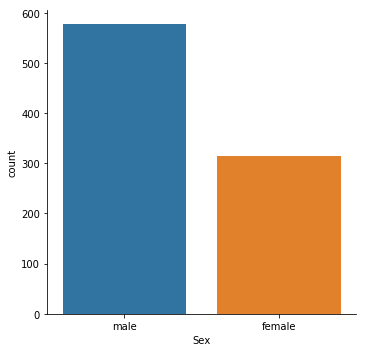

In [294]:
sns.catplot('Sex',data=df,kind='count')

In [295]:


#df1   
def male_female(df1):
    age,sex=df1
    if(age<16):
        return (sex+'-child')
    else:
        return sex
        

In [296]:
df['Sex1']=df[['Age','Sex']].apply(male_female,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


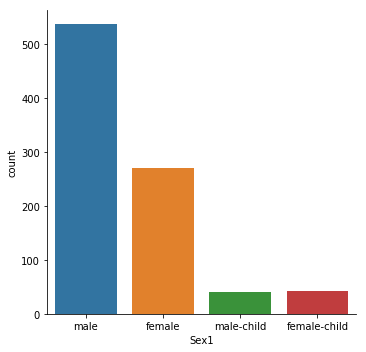

In [297]:
sns.catplot('Sex1',data=df,kind='count')

In [298]:
df['Sex1'].value_counts()

male            537
female          271
female-child     43
male-child       40
Name: Sex1, dtype: int64

In [299]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

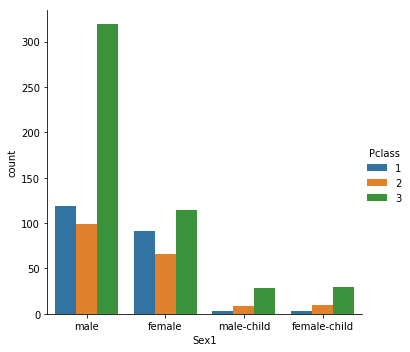

In [300]:
sns.catplot('Sex1',data=df,kind='count',hue='Pclass')

In [301]:
df2=DataFrame(df.groupby(['Sex1','Pclass','Survived']).size())
df2


0
Sex1         Pclass Survived     
female       1      0           2
                    1          89
             2      0           6
                    1          60
             3      0          58
                    1          56
female-child 1      0           1
                    1           2
             2      1          10
             3      0          14
                    1          16
male         1      0          77
                    1          42
             2      0          91
                    1           8
             3      0         281
                    1          38
male-child   1      1           3
             2      1           9
             3      0          19
                    1           9

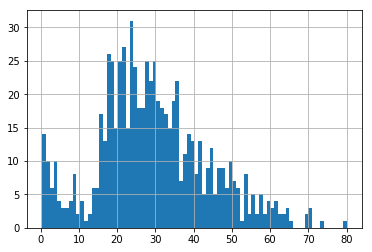

In [302]:
df['Age'].hist(bins=80)

In [303]:
df.Age.mean()

29.69911764705882

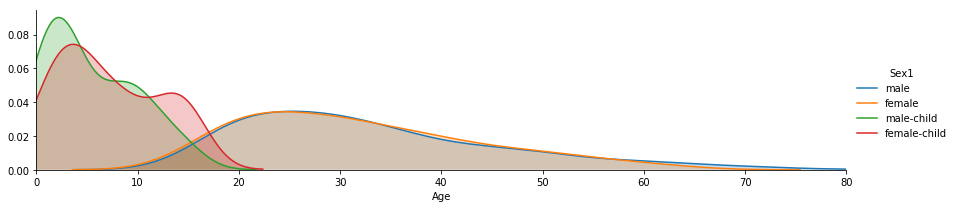

In [304]:
fig=sns.FacetGrid(df,hue='Sex1',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

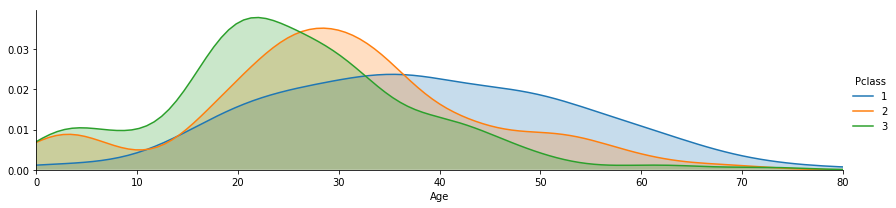

In [305]:
fig=sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [306]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [307]:
deck=[]
for data in df['Cabin']:
    if(type(data)==str):
        deck.append(data[0])
    else:
        deck.append('none')
        


In [308]:
df['Deck']=deck
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,none
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,none
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,none


In [309]:
df.groupby('Deck').size()

Deck
A        15
B        47
C        59
D        33
E        32
F        13
G         4
T         1
none    687
dtype: int64

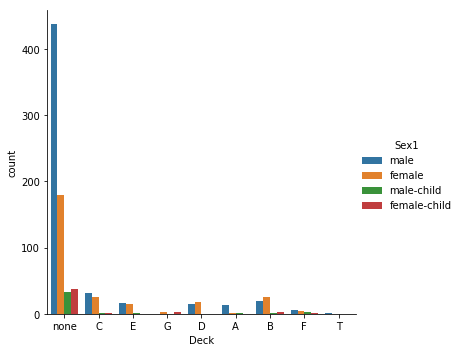

In [310]:
sns.catplot('Deck',data=df,kind='count',hue='Sex1')

In [323]:
col=df['Deck']
col=col[col!='none']
col=DataFrame(col)
col.head()

,Deck
1,C
3,C
6,E
10,G
11,C


In [312]:
#df['Survived']=df['Survived'].map({0:'no',1:'yes'})

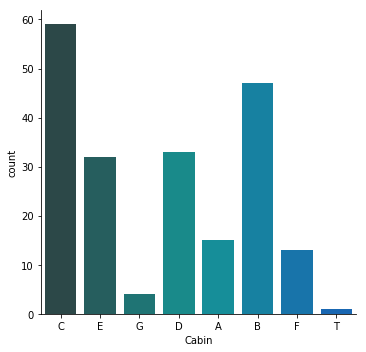

In [313]:
levels = []
deck = df['Cabin'].dropna()
# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

In [314]:
df['Family']=df.Parch+df.SibSp
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1,Deck,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,none,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,none,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,none,0


In [315]:
df.Family=np.where(df.Family!=0,'family','alone')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1,Deck,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,none,family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,none,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,none,alone


In [316]:
df.Family.value_counts()

alone     537
family    354
Name: Family, dtype: int64

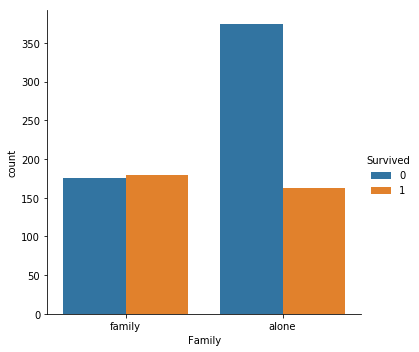

In [317]:
sns.catplot('Family',data=df,hue='Survived',kind='count')

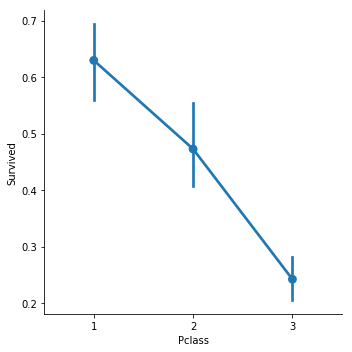

In [318]:
sns.catplot(y='Survived',x='Pclass',data=df,kind='point')

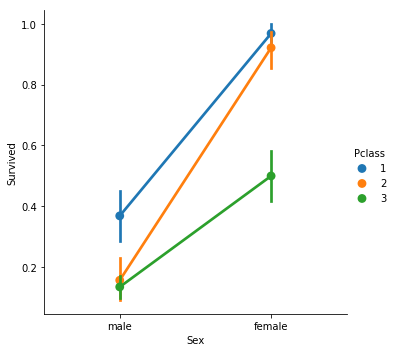

In [319]:
sns.catplot(y='Survived',x='Sex',data=df,kind='point',hue='Pclass')

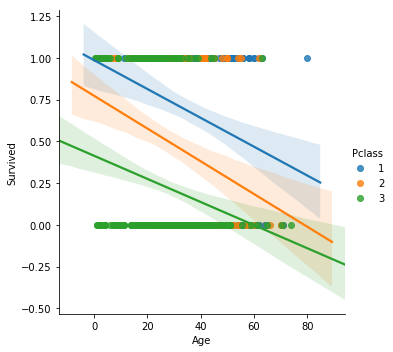

In [320]:
sns.lmplot(y='Survived',x='Age',data=df,hue='Pclass')

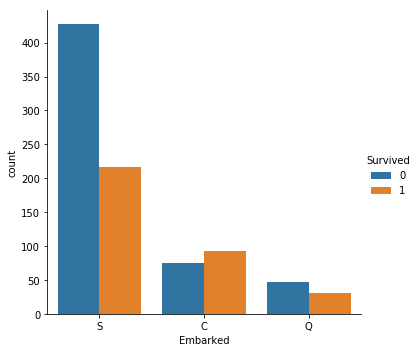

In [321]:
sns.catplot('Embarked',data=df,kind='count',hue='Survived')

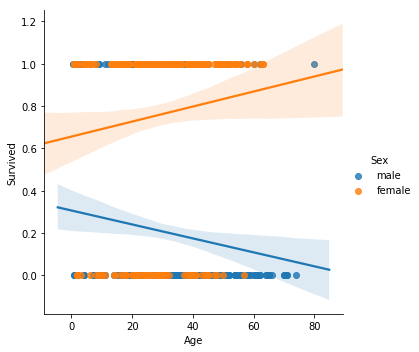

In [322]:
sns.lmplot('Age','Survived',hue='Sex',data=df,)